# Lab 6: Solar Spectrum


### I. Abstract

We use calibrated neon spectrum data to calibrate the wavelength dimensions of the Angell Hall CCD, and use this to identify prominent spectral lines on observed solar spectrum data. To calibrate the CCD, we find offset and shift parameters to calibrate the pixel dimensions of the neon spectrum to Angstoms, visually matching prominent emission lines in the spectra to the known neon emission lines. We apply this wavelength calibration to solar spectroscopy data taken using the same CCD. We identify three promnent absortion lines at 7593.7, 6867.19, and 6562.81 Angstroms, corresponding to O$_2$, O$_2$, and H$_{alpha}$ elements. This excercise gives a demonstration of basic CCD calibration methods, and gives experience using fits and spectrum data in python.


### II. Introduction

Light we receive on Earth from various stars, including the sun, are generally observed to be somewhat of a continuous spectrum spanning the visible spectrum. The reason for this is due to the approximate blackbody nature of stars - they exhibit highly similar properties to those of a pure blackbody. This includes, obviously, the continuous spectrum of a blackbody's thermal radiation, which is governed by the Boltzmann Law: $F = \sigma \cdot T^4$, where F is the flux, $\sigma$ is the Boltzmann constant, and T is temperature. However, unlike an ideal continuum blackbody spectrum of light, when we observe the actual spectra of a star, we see many jagged lines that appear to cut down into the spectrum. These are known as spectral lines - primarily absorption lines in the case of stellar spectra. 
	
We can further study these absorption lines by considering the outdated but useful Bohr model of an atom. In the Bohr model, electrons can only exist in certain energy states, or "orbits". The atom can change energy states by either absorbing or emitting a photon of the exact energy needed to change energy levels. In the case of absorption lines, the light from stars pass through some material containing certain atoms/molecules, whether it be a gas or an atmosphere of some kind, and, if it is at a low enough temperature/energy, these atoms will absorb the necessary wavelengths needed in order to move to higher energy states. We then observe these wavelengths on the spectra as being dark, as a large amount of the light has been absorbed.	The photosphere and chromosphere, which are basically the stellar "atmosphere", are gas surrounding the surface of the star at a much lower temperature, meaning lower energy than the radiated light. The elements of the gas can then readily get to excited states using the light from the star that passes through. The vast majority of the absorption lines, naturally, come from here. Certain elements and molecules from the Earth's atmosphere can also contribute to the absorption lines, such as oxygen. The shortcoming of the Bohr model is that it does not explain why some spectral lines are stronger than others.

The purpose of conducting this experiment is to use the Angell Hall telescope to collect both neon emission and solar spectrum measurements. We can then use the neon measurements to calibrate the spatial wavelength dimension of the CCD, and thus identify the wavelengths that absorption lines appear at in our solar spectrum data. In doing so, not only will the various solar absorption lines be experimentally verified, but it may show interesting patterns or results of note that may shine additional light into understanding stellar spectroscopy.

### III. Theory

##### Discuss the theory behind how the spectral dispersion (nanometers per pixel) is set by the properties of the optical system (including the telescope) and spectrograph. 8 points. 

The spectral dispersion is dependent on the properties of the diffraction grating, and the slit determines the resolution of the spectrum. In diffraction gratings, light is reflected off specific steps seprated by some distance $d$. Interference of the light beams cause maxima and minima in certain directions, and are characterized by certain orders. The angles of the steps in the grating can also be changed, or "blazed" to place light in desired order. 

The spectral dispersion is determined by the spacing d of the diffraction grating. The grating equation is given by:
$$ n \lambda = dsin(\alpha) + dsin(\beta)$$

where n is order, and $\alpha$ and $\beta$ are the angles with respect to the incident beam and diffracted beam from the grating normal vector respectively. We can then define the angular dispersion, which is the rate of change of $\beta$ with respect to wavelength. Taking $\alpha$ to be constant, we can differentiate the grating equation with respect to $\lambda$ (we use distance instead of d to differentiate differentials with distance variable):
$$\frac{dsin(\beta)}{d\lambda} = cos(\beta) \cdot \frac{d\beta}{d\lambda} = \frac{n}{distance}$$

Thus, $$\frac{d\beta}{d\lambda} = \frac{n}{distance\cdot cos\beta}$$. We can find the more perhaps useful form of linear dispersion, defined to be the rate of change of linear distance with respect to wavelength.
$$\frac{dx}{d\lambda} = \frac{dx}{d\beta}\frac{d\beta}{d\lambda} = F \frac{d\beta}{d\lambda}$$

where F is the focal length of the spectrograph camera, and is equal to the inverse of the plate scale = $\frac{d\beta}{dx}$

We can invert the defined linear dispersion to be given in units of wavelength per length of detector:
$$\frac{d\lambda}{dx} = \frac{distance \cdot cos\beta}{n \cdot F}$$
##### Discuss the theory behind how you can calibrate the wavelength scale using a calibration lamp.   8 points. 

Using a calibration lamp, of an element with many well known spectral emission lines, we can match a plotted observational spectrum of the lamp, with the locations of these known emission lines. Specifically, given an observation of a calibration lamp, the CCD will have locations of spectral lines in the horizontal dimension to the diffraction grating slit. These correspond to "images" of the slit at every wavelength in the spectra. In order to quantify the wavelength scale and locations on the CCD, we can plot the spectra of the lamp vs the pixel values of the CCD. We can then plot the locations of the known emission lines of the lamp, in units of wavelength. The CCD pixel value x array can then be manipulated, so that the emission points in the plotted spectra match known emission lines from the lamp. Using a "stretch" and "offset" paramter, which correspond to the number of wavelegnth unit (whichever units the known lines were plotted at) per pixel and the offset in wavelength unit respectively. These two paramters, experimentally and iteratively found, give us the wavelegnth scale off the CCD - we are essentially identifying the scale of a pixel in terms of wavelength, and assigning an exact wavelength to at least one pixel (the offset) which allows us to identify each pixel on the CCD with a wavelength value. This calibration can now be used to find the wavelegnth locations of other spectral data taken on the CCD.


##### Comment on what properties of the structure and composition of stars determine how strong the stellar absorption lines can be.  In other words, are features that are strongest in a stellar absorption spectrum always those with the highest abundance?  Why not?   4 points. 

The concept that the strongest and most prominent absorption lines in a stars spectra correspond to the most abundant elements in the chemical composition star is the basis of how scientists initially thought of identifying the composition of stars. Unfortunately, this idea is not entirely accurate. In order for an element to absorb the sun's light, it must be in a specific energy level. There may be a large number of elements in the wrong energy level, and thus there is not a strong absorption line. For example, we observe a strong H$_{\alpha}$ absorption line in the sun's spectrum, but having a lot of hydrogen does not assure a strong H$_{\alpha}$ absorption, since many Hydrogen may be in the wrong energy level, and thus not contribute. In general, the intensity of an absorption line depends on the number of atoms in the correct state for the particular transition needed. The number of these atoms in the correct state per unit volume is called the population of that state. 

The absorption lines in a stellar spectra arise primarily from the elements in the stars photosphere - the absorption line intensity that arise from these elements is a complicated relationship of mainly temperature and pressure. given the temperature in the atmosphere of a star, we can use the boltzmann equation to predict how many atoms will be in a state $i$ to absorb a wavelength, and thus the strenght of specific absorption lines: 
$$\frac{n_j}{n_i} = \frac{g_j}{g_i} \cdot e^{-\frac{E_j-E_i}{kT_k}}$$

where $n_j$ and $n_i$ are the populations of levels i and j, $T_k$ is the kinetic temperature, and $g_j$ and $g_i$ are  statistical weights. The statistical weight of an energy level is a count of the sublevels in that level, and is typically a small integer value. An additional parameter to consider is the ioniziaton of atoms that occurs at high temperatures.

Consider the $H_{alpha}$ line. At low temperatures, most of the Hydrogen in the stellar atmosphere will be neutral, and thus the line will be weak. For increasingly higher temperatures, more Hydrogen will be in correct excited states, and the intensity of the absorption line will increase. At extremely high temperatures, the hydrogen iwlll become ionzied, and thus the line will become weaker. We can apply this general concept to classify stars accordig to spectral types, according to the relative strength of absorption lines from certain atoms.



### IV. Experiment and Methodology

In [1]:
import numpy as np
from astropy.io import fits
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline
rc('figure', figsize=(12.0, 9.0))

In [2]:
# Read in the five calibration image data files
caldb5 = []
for i in range(1,6):
    caldb5.append(fits.getdata("skylabSGSNoTarget0000001{}.fit".format(i)).astype(int))

#print(caldb5)
caldb_raw = (caldb5[0]+caldb5[1]+caldb5[2]+caldb5[3]+caldb5[4])/5   # Average the five files into final array
#print(caldb_raw)

In [3]:
# Read in the 5 background data files
bkg5 = []
for i in range(16,21):
    bkg5.append(fits.getdata("skylabSGSNoTarget000000{}.fit".format(i)).astype(int))
#print(bkg)
bkg = (bkg5[0]+bkg5[1]+bkg5[2]+bkg5[3]+bkg5[4])/5  #Average bkg files into final bkg file
#print(bkg)

In [4]:
# Subtract bkg from the calibration image

caldb = caldb_raw - bkg
#print(caldb)
#print(caldb[1,0])

In [5]:
print(caldb.shape)
print("caldbraw",np.where(caldb_raw>3500))
print("caldb",np.where(caldb>2100))
print("bkg",np.where(bkg>3500))
#print(np.where(caldb))

#Note the anomolously high count values in the rows ~142-146. When plotting/analyzing spectrum, will ignore these rows. 

(255, 1530)
caldbraw (array([  1,  47,  50, 143, 143, 143, 143, 143, 143, 144, 144, 144, 144,
       144, 144, 145, 145, 145, 145, 146, 146, 172, 214, 241]), array([1484,  161,  599, 1167, 1168, 1216, 1217, 1218, 1219, 1216, 1217,
       1218, 1241, 1242, 1300, 1300, 1340, 1364, 1365, 1364, 1365, 1343,
       1524, 1419]))
caldb (array([142, 143, 143, 143, 143, 143, 143, 144, 144, 144, 144, 144, 144,
       145, 145, 145, 145, 145, 146, 146]), array([1168, 1167, 1168, 1216, 1217, 1218, 1219, 1216, 1217, 1218, 1241,
       1242, 1300, 1300, 1340, 1341, 1364, 1365, 1364, 1365]))
bkg (array([  1,  47,  50, 172, 214, 241]), array([1484,  161,  599, 1343, 1524, 1419]))


In [6]:
#caldbtest = caldb + 0
#caldbtest[np.where(caldb>3500)] = 0
#caldbtest2 = caldb_raw + 0
#caldbtest2[np.where(caldb_raw>3500)] = 0

In [7]:
caldb_show = caldb_raw - bkg
caldb_show[np.where(caldb_show > 2100)] = 0
caldb_show[np.where(caldb_show < -300)] = 0

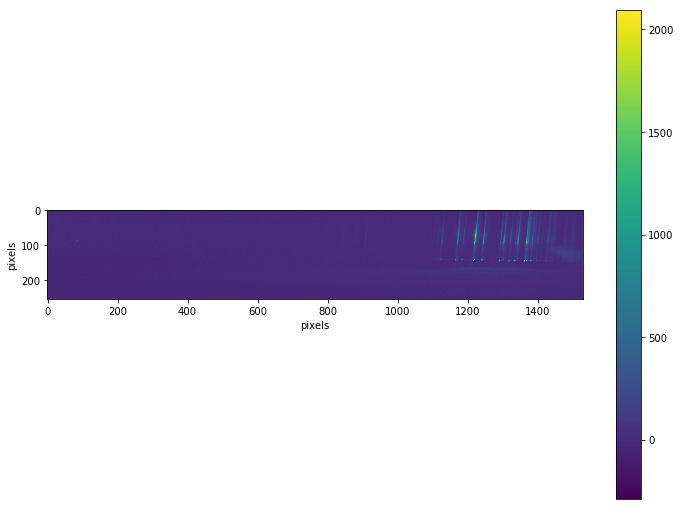

In [8]:
plt.imshow(caldb_show)
plt.xlabel("pixels")
plt.ylabel("pixels")
plt.colorbar()
plt.show()

Figure above shows the image of the spectral data of the neon calibration lamp. Several data values were manipulated in order to provide a better contrast image, but the full, non-image-manipulated data is used in the analysis.

Background frames were subtracted as well, which helped remove any high locations inherent to the detector, since abnormal pixel values in the background frames will be correspondingly high in the calibration data, thus subtracting will normalize these abnormalities. It also subtracts the dark current of data.

In [9]:
caldb.shape

(255, 1530)

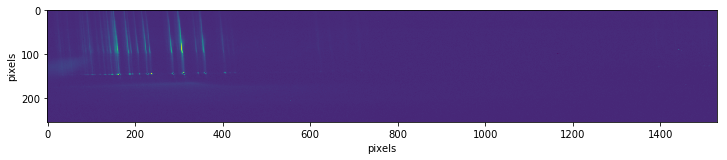

In [10]:
caldbr = caldb[:,::-1]   # Flip the array horizontally, so that wavelgnth increases to the right.
caldbr_show = caldb_show[:,::-1]
plt.imshow(caldbr_show)
plt.xlabel("pixels")
plt.ylabel("pixels")
plt.show()

Figure above shows the flipped spectral lamp data, so that the red/blue -ish  wavelengths are to the left/right of the array.

Compared to other neon spectra, the relative brightness of the spectral lines observed may be different, but their locations in the spectral dimension should be the same. The difference in relative brightness may be due to differing parameters such as gas density and temperature of the neon.

In [11]:
# Will analyze the rows 70-72
caldbr_rows = []
for i in range(70,73):
    caldbr_rows.append(caldbr[i,:])

#print(caldbr_rows)
#print(caldbr[0,:])
caldbr_row = np.mean(caldbr_rows,axis=0)    # collapse three rows into a single dimension
#print(caldbr_row)

In [12]:
colnumber = len(caldbr_row)
print(colnumber)
wavelength = np.loadtxt("neon_jdm.txt",usecols=(0)) #read from neon line text file. Unit for wavelength is Angstrom

#print(wavelength)
wavelength = wavelength[25:]   # limit to only wavelgnths in range of CCD
print(wavelength)

1530
[  5804.4496   5820.1558   5852.4878   5881.895    5944.8342   5975.534
   6029.9971   6074.3377   6096.1631   6128.4499   6143.0626   6163.5939
   6217.2812   6266.495    6304.789    6334.4278   6382.9917   6402.246
   6506.5281   6532.8822   6598.9529   6678.2764   6717.043    6929.4673
   7024.0504   7032.4131   7173.9381   7245.1666   7438.899    7488.8712
   7535.7739   8136.4057   8300.3263   8377.6065   8495.3598   8591.2583
   8634.647    8654.3831   8655.522    8679.493    8681.921    8704.111
   8771.656    8780.621    8783.75     8830.907    8853.867    8919.5007
   9148.672    9201.759    9300.853    9326.507    9425.379    9486.68
   9534.163    9665.424   10798.12    10844.54    11143.02  ]


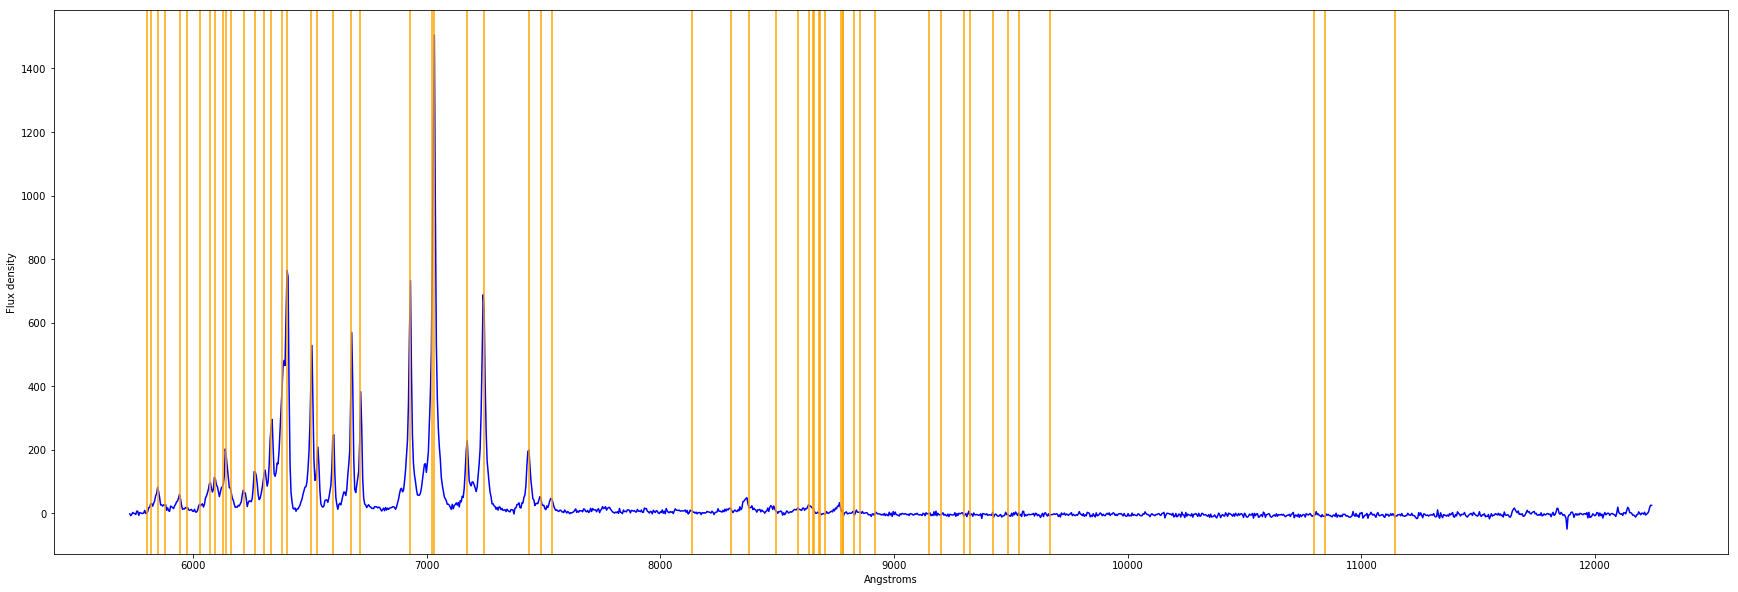

In [13]:
rc('figure', figsize=(30.0, 10.0))
x_range = np.arange(1530)  # Create x array to plot over - represents incremental pixel values 
stretch = 4.259 # These stretch and off variables were manually varied to visuall calibrate the x array to the lines
off = 5729.82
columnp = stretch * x_range + off   # calibrated wavelength x array
caldbr_row = np.mean(caldbr_rows,axis=0)
#caldbr_row[np.where(caldbr_row<20)] = 0
plt.plot(columnp,caldbr_row, color="blue")
#plt.xlim(6000,7600)
for col in wavelength:
    plt.axvline(col, color="orange")
plt.xlabel("Angstroms")
plt.ylabel("Flux density")
plt.show()

Figure above shows oveprlots of neon emission lines in orange, over the lamp spectral data, in blue. The x array is calibrated so that the lines lie on top of emission lines in spectra.

In [14]:
# The lines that were used to calibrate the spectrum were all of the first 32 lines, which all correspond to some sort
# of emission in the spectrum. These lines are given by wavelengths:
print("neon lines:")
print(wavelength[:32])
print("~~~~~~~~")
#These lines correspond to the pixel values given approximately by:
print("pixel values:")
print(np.floor((wavelength[:32] - off)/stretch))

neon lines:
[ 5804.4496  5820.1558  5852.4878  5881.895   5944.8342  5975.534
  6029.9971  6074.3377  6096.1631  6128.4499  6143.0626  6163.5939
  6217.2812  6266.495   6304.789   6334.4278  6382.9917  6402.246
  6506.5281  6532.8822  6598.9529  6678.2764  6717.043   6929.4673
  7024.0504  7032.4131  7173.9381  7245.1666  7438.899   7488.8712
  7535.7739  8136.4057]
~~~~~~~~
pixel values:
[  17.   21.   28.   35.   50.   57.   70.   80.   86.   93.   97.  101.
  114.  126.  135.  141.  153.  157.  182.  188.  204.  222.  231.  281.
  303.  305.  339.  355.  401.  413.  424.  565.]


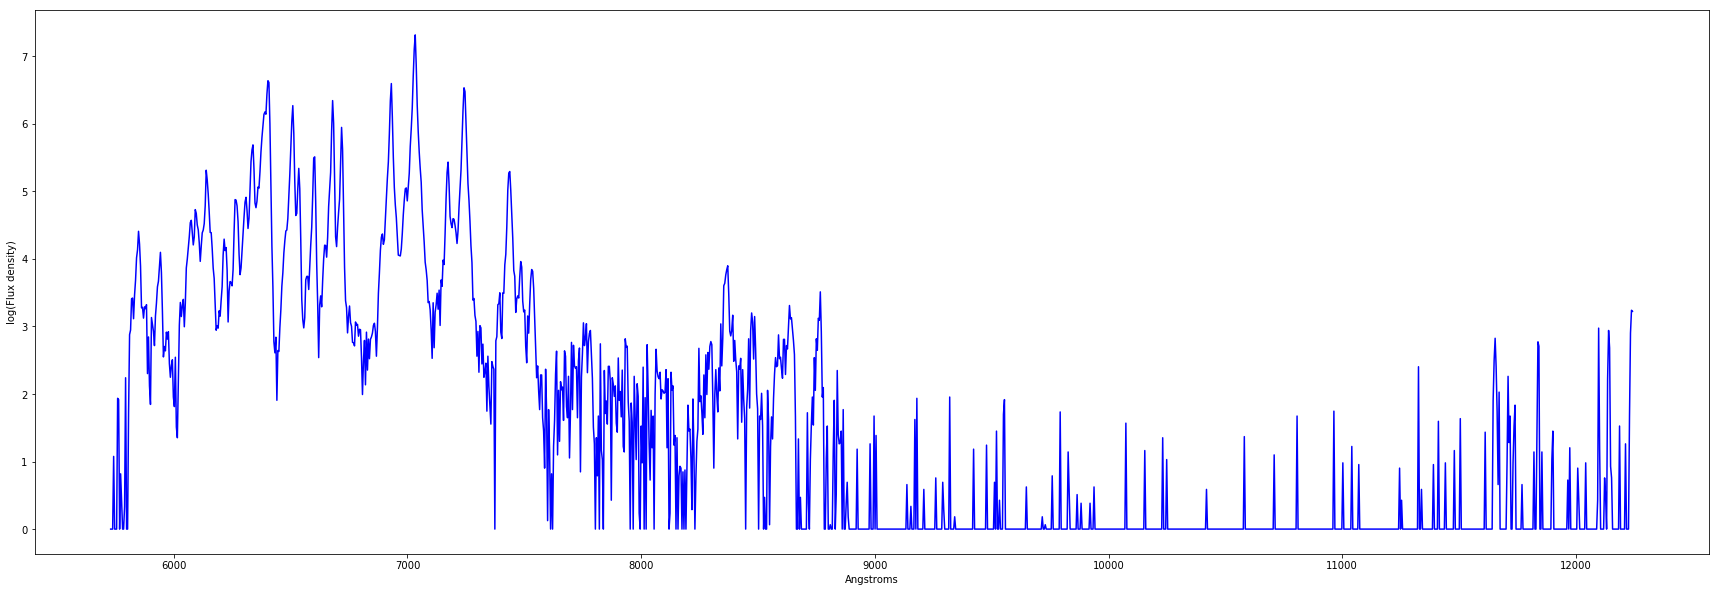

In [15]:
caldbr_row[np.where(caldbr_row<1)] = 1.
plt.plot(columnp,np.log(caldbr_row), color="blue")
plt.xlabel("Angstroms")
plt.ylabel("log(Flux density)")
plt.show()

Figure above is the log of the spectrum data versus the calibrated wavelgength x array.

In [16]:
# import 5 solar spectrum data and 5 dark frames
sky5 = []
for i in range(1,6):
    sky5.append(fits.getdata("skylabSGSNoTarget0000002{}.fit".format(i)).astype(int))

dark5 = []
for i in range(26,31):
    dark5.append(fits.getdata("skylabDark000000{}.fit".format(i)).astype(int))

Dark frame is analogous to the background frame subtracted from the calibration data. It removes hot pixels/dark noise from data.

In [17]:
sky_raw = (sky5[0]+sky5[1]+sky5[2]+sky5[3]+sky5[4])/5
dark = (dark5[0]+dark5[1]+dark5[2]+dark5[3]+dark5[4])/5
sky = sky_raw - dark
#print(sky)
skyr = sky[:,::-1]  # subtract mean dark from mean sky data, and flip

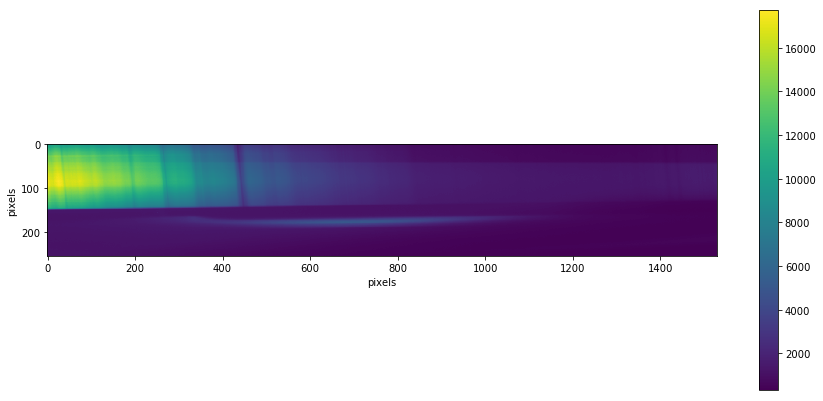

In [18]:
rc('figure', figsize=(15.0, 7.0))
plt.imshow(skyr)
plt.colorbar()
plt.xlabel("pixels")
plt.ylabel("pixels")
plt.show()

Figure above shows the solar spectrum data CCD image. We can see the absorption lines in the spectra slighty as dark lines.

In [19]:

skyr_rows = []   # collapse same rows used in calibration, since those were the rows that were calibrated specifically
for i in range(70,73):
    skyr_rows.append(skyr[i,:])

#print(caldbr_rows)
#print(caldbr[0,:])
skyr_row = np.mean(skyr_rows,axis=0)
#print(skyr_row)


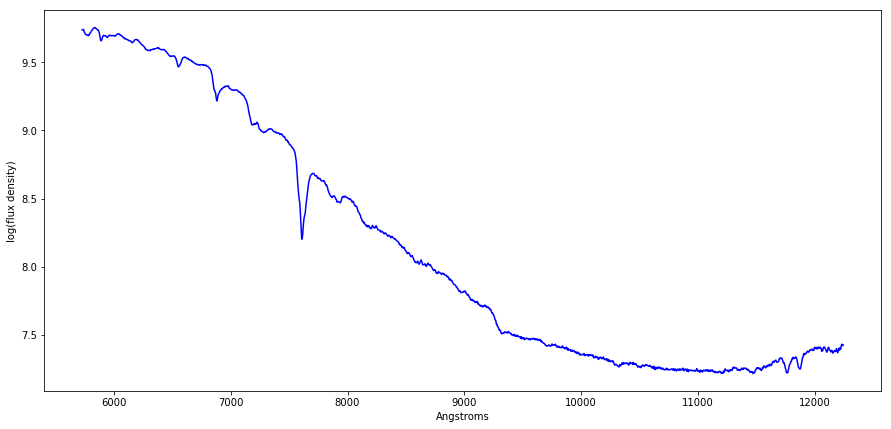

In [20]:
rc('figure', figsize=(15.0, 7.0))
plt.plot(columnp,np.log(skyr_row), color="blue")
plt.xlabel("Angstroms")
plt.ylabel("log(flux density)")
plt.show()

Figure above is the log solar spectrum, plotted against the calibrated wwavelength pixel dimension. From inspection, there appear to be several absorption lines in the spectrum. We can quanitfy specific lines in the spectrum by overplotting primary Fraunhauffer lines.

The absorption lines have some degree of broadening, some more than others. This is arises partially due to thermal doppler broadening. Since atoms have thermal random motion, there is some small degree of motion which causes doppler distributions of wavelengths around the specific wavelength the light is absorbed at. The temperature of different atoms can differ in the solar atmosphere. Pressure can also affect the broadening of lines.

Nearly all the lines are absorption since the light source from the sun is very high energy, meaning all the gas it passes through is likely "cooler", which leads to the absorption lines. A "hotter" gas is needed in front of the sun in order to observe emission, which is not present in between the sun and Earth.

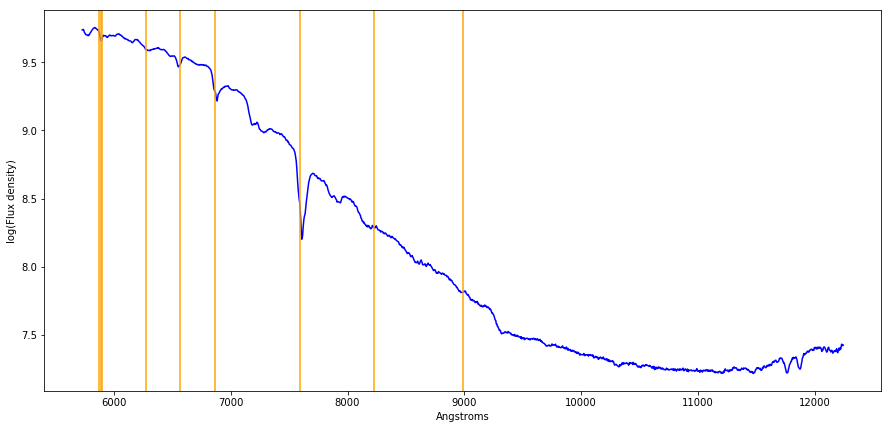

In [21]:
plt.plot(columnp,np.log(skyr_row), color="blue")
lines = np.loadtxt("fraunh_lines.txt",usecols=(0))
#print(lines)
lines = lines[0:9]
for i in lines:
    plt.axvline(i*10,color="orange")
plt.xlabel("Angstroms")
plt.ylabel("log(Flux density)")
plt.show()

Figure above illustrates the overplotted primary Fraunhauffer lines, on top of the calibrated solar spectrum data.

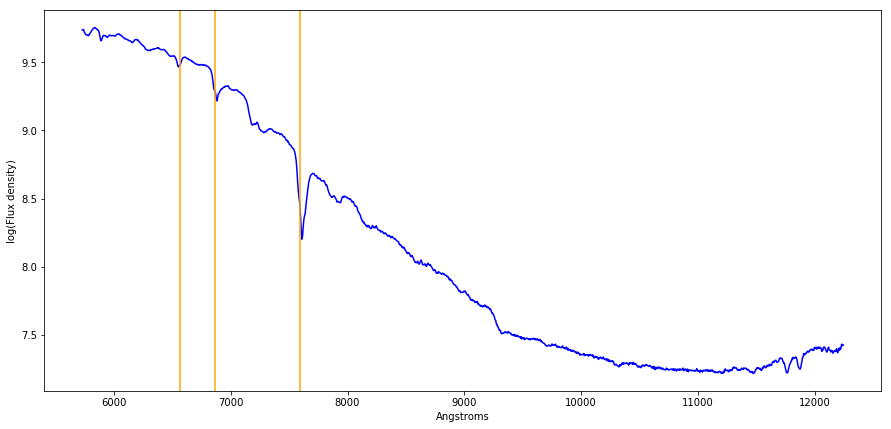

In [22]:
plt.plot(columnp,np.log(skyr_row), color="blue")
plt.axvline(lines[4]*10,color="orange")
plt.axvline(lines[2]*10,color="orange")
plt.axvline(lines[3]*10,color="orange")
plt.xlabel("Angstroms")
plt.ylabel("log(Flux density)")
plt.show()

Figure above shows the three lines identified: 7593.7, 6867.19, 6562.81 Angstroms. These lines correspond to O2, O2, and H$_{\alpha}$ respectively. 

##### Do the relative absorption depths of the features you identify match the solar spectrum you are consulting?  Why not?  How are these specific lines important in understanding the Sun and similar stars?

The relative absorption depths of the O2 and H alpha lines match somewhat closely to the the referenced solar spectrum, taken from http://bass2000.obspm.fr/solar_spect.php, though they are not identical. THe 7593.7 O2 line is significant in both, but in the referenced spectrum, the H alpha and O2 lines are nearly identical in intensity, though here, the O2 is significantly larger. The difference between the relative intensitites between these two sources of the solar spectrum is likely due to the fact that the data taken here was scattered off the sky - The O2 lie likely arises from the earths atmosphere, so differences can be expected based on air mass. 

These specific lines are important in stellar classification, and thus in identifying the temperature of the star, as well as the chemical composition of their atmospheres. By identifying not only the existence of certain lines, but also their relative intensity, the stellar classification system can be defined, which allows us to identify stars by their spectra, and characterize them by temperature. 

### V. Summary

We import the five neon spectrum observations, as well as the five background observations. We subtract the mean background frame from the mean neon frame. From this, we take the average of three rows to collapse the spectrum in one dimension, and plot the flux vs horizontal pixel value. We then overplot known neon emission line locations in Angstroms, and scale the pixel value axis, using a stretch and offset parameter, so that the emission line locations in the spectra plot are exactly matched by the neon line locations. 

With this stretch and offset scale parameter for the CCD pixel dimension, we plot the solar spectrum as a function of wavelength. We then, similar to the neon calibration method, overplot prominent Fraunhauffer lines. We identify three lines that match areas of prominent absorption dip strength in the spectrum: at wavelengths of 7593.7, 6867.19, and 6562.81 Angstroms. These wavelengths correspond to O2, O2, and H$_{\alpha}$ emission lines. 

### VI. Conclusions

We found approximate stretch and offset parameters to the pixel dimension to be 4.259 angstroms per pixel, and 5729.82 angstroms repspectively. We used these parameters to calibrate the solar spectrum data, by plotting vs the calibrated CCD pixel array. From the solar spectrum, we've identified three absorption lines due to O2 and H$_{alpha}$. 

We can accurately presume that the O$_2$ absorption lines at 7593.7 and 6867.19 angstroms originate from the Earth's atmosphere. This is due in part to the abundance of O$_2$ moldecules in the Earth's atmosphere, and also due to the rarity of molecules existing in the stellar atmosphere. It is difficult for molecules to exist at such an extreme environment. Most species actually originating from the sun are ionized forms of single atoms. Thus, these two O$_2$ lines are what are known as Telluric lines, which are spectral lines that originate from Earth's atmosphere, and not from the source being observed. H$_{\alpha}$ originates from the sun